In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

In [225]:
# Load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [226]:
# Check for missing values
df.isnull().sum()


,0
Country,0
Other names,1
ISO 3166-1 alpha-3 CODE,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Tot Cases//1M pop,0
Tot Deaths/1M pop,0
Death percentage,0


In [227]:
# Check for missing values in the 'Other names' column
missing_other_names = df[df['Other names'].isnull()]

# Display the rows with missing values in 'Other names'
print("Rows with missing 'Other names':")
print(missing_other_names[['Country', 'Other names']])


Rows with missing 'Other names':
        Country Other names
135  Montenegro         NaN


In [228]:
# Fill missing values in 'Other names' column with 'Unknown'
df['Other names'].fillna('Unknown', inplace=True)

# Check if the missing value is filled
print(df.loc[df['Country'] == 'Montenegro', ['Country', 'Other names']])


        Country Other names
135  Montenegro     Unknown


/tmp/ipython-input-1474832705.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              225 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [230]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


**Exploratory Data Analysis**

In [231]:
import plotly.express as px

# Ensure the 'Continent' column is properly formatted and not missing
df['Continent'] = df['Continent'].astype(str).str.strip()

# Create the choropleth map for countries grouped by continent
fig = px.choropleth(df,
                    locations="ISO 3166-1 alpha-3 CODE",
                    color="Continent",
                    hover_name="Country",
                    title="World Map of Countries by Continent",  # Title of the map
                    # locationmode='country names'  # Use country names for locations
)

# Update the layout for better presentation
# fig.update_geos(showcoastlines=True, projection_type="natural earth")

# Show the map
fig.show()


/tmp/ipython-input-1484893177.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




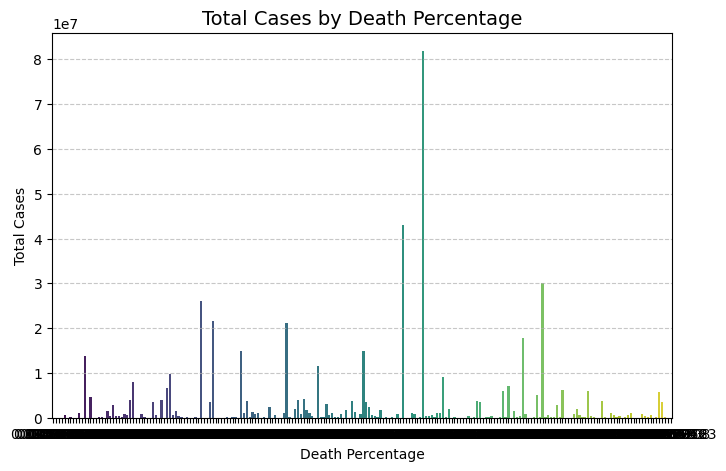

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you want to visualize the relationship between 'Death percentage' and 'Total Cases'
plt.figure(figsize=(8,5))
sns.barplot(x='Death percentage', y='Total Cases', data=df, palette='viridis')
plt.title('Total Cases by Death Percentage', fontsize=14)
plt.xlabel('Death Percentage')
plt.ylabel('Total Cases')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**ENCODING**

In [233]:
from sklearn.preprocessing import LabelEncoder

# Encode only the 'Continent' column using LabelEncoder
if 'Continent' in df.columns:
    le = LabelEncoder()
    df['Continent'] = le.fit_transform(df['Continent'])
    print("\nLabel Encoding applied on: 'Continent'")
else:
    print("\n'Continent' column not found.")



Label Encoding applied on: 'Continent'


In [234]:
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,1,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,2,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,0,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,2,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,0,99194,1900,2862,55,1.915438


**Data Scaling**

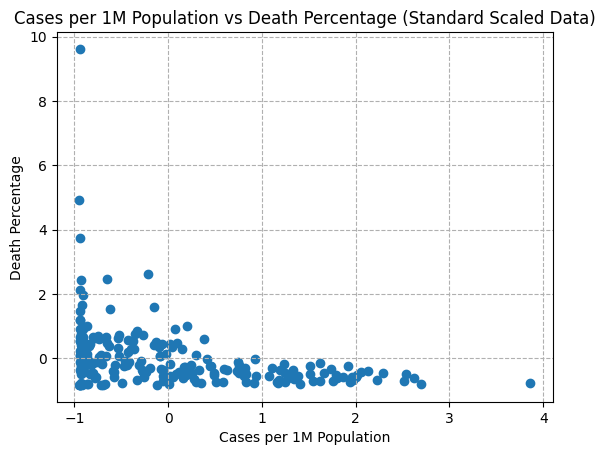

In [235]:
# --- Scale dataset with Standard Scaler (adjusted for COVID-19 Dataset) ---

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Clean column names by stripping any extra spaces (just in case)
df.columns = df.columns.str.strip()

# Initialize the StandardScaler
sc = StandardScaler()

# Use only numeric columns from your dataset
# Correcting column names to match the exact names in the DataFrame (note the non-breaking spaces)
num_cols = ['Population', 'Total Cases', 'Total Deaths', 'Tot Cases//1M pop',
            'Tot Deaths/1M pop', 'Death percentage']

# Scale the numeric columns
df_sc_scaled = pd.DataFrame(sc.fit_transform(df[num_cols]), columns=num_cols)

# For the sake of this example, we can keep the 'Continent' column for reference (no scaling needed)
df_sc_scaled['Continent'] = df['Continent']

# Display the first few rows of the scaled data
df_sc_scaled.head()

# Visualization (using two main features for scatter plot)
# We can visualize the relationship between 'Tot Cases//1M pop' and 'Death percentage' after scaling
plt.scatter(df_sc_scaled["Tot\xa0Cases//1M pop"], df_sc_scaled["Death percentage"])
plt.xlabel("Cases per 1M Population")
plt.ylabel("Death Percentage")
plt.grid(axis='both', linestyle='--')
plt.title("Cases per 1M Population vs Death Percentage (Standard Scaled Data)")
plt.show()

Most countries show a low death percentage (close to zero) and also have lower values for cases per 1M population.

A few data points show higher values of death percentage (greater than 2%), but these points are rare, indicating that only a small number of countries have significantly higher death rates.

The majority of the data is clustered near the bottom-left corner, suggesting that most countries have lower case rates per 1 million population and lower death percentages.

In [236]:
df_sc_scaled

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,1
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,2
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0
...,...,...,...,...,...,...,...
220,-0.252370,-0.300882,-0.283846,-0.657924,-0.380297,0.056233,5
221,-0.247964,-0.300943,-0.283908,-0.945741,-0.917573,4.923244,0
222,-0.029496,-0.299318,-0.261751,-0.943220,-0.861415,9.613966,1
223,-0.113643,-0.257269,-0.242884,-0.832253,-0.746584,-0.111060,0


**K-Means Clustering**

In [237]:
from sklearn.cluster import KMeans

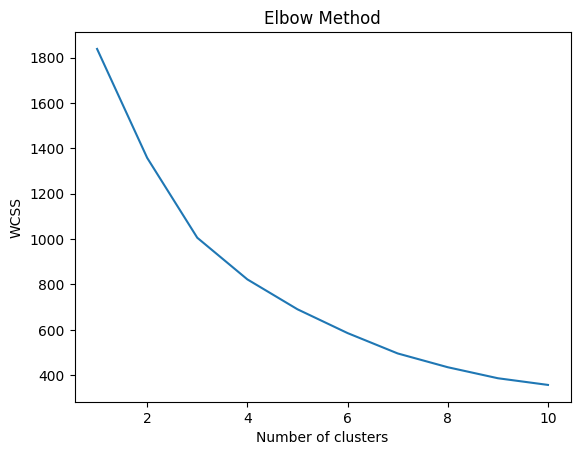

In [238]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

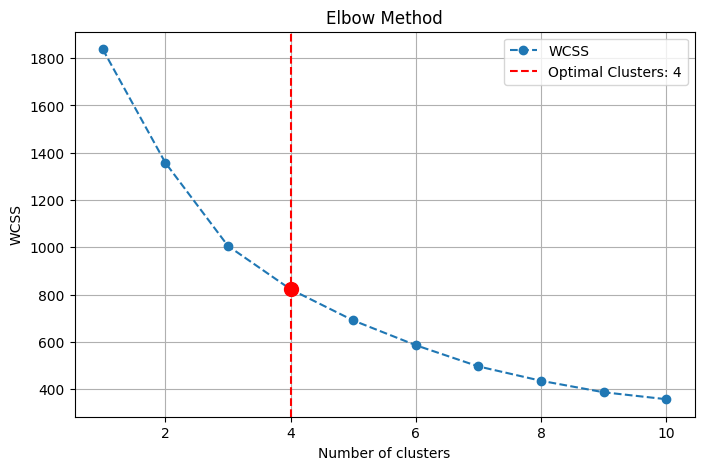

The optimal number of clusters is: 4


In [239]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [240]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,KMeans_Cluster
0,Afghanistan,Afghanistan,AFG,40462186,1,177827,7671,4395,190,4.313743,0
1,Albania,Albania,ALB,2872296,2,273870,3492,95349,1216,1.275058,1
2,Algeria,Algeria,DZA,45236699,0,265691,6874,5873,152,2.587216,0
3,Andorra,Andorra,AND,77481,2,40024,153,516565,1975,0.382271,2
4,Angola,Angola,AGO,34654212,0,99194,1900,2862,55,1.915438,0


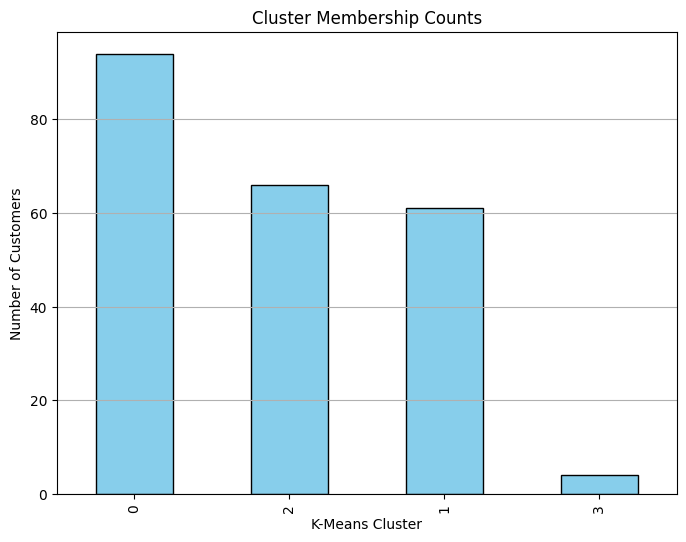

In [241]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [242]:
import plotly.express as px

# Ensure the 'Country' column and 'Cluster' labels are available
fig = px.choropleth(df,
                    locations="ISO 3166-1 alpha-3 CODE",  # Use the Country column for locations
                    color="KMeans_Cluster",  # Color countries based on the cluster
                    hover_name="Country",  # Display the country name when hovering
                    color_continuous_scale=px.colors.sequential.Plasma,  # Choose color scale
                    title="World Map Colored by Clusters",  # Title of the map
                    locationmode='country names'  # Use country names for locations
)

# Update the layout for better presentation
fig.update_geos(showcoastlines=True, coastlinecolor="Black", projection_type="natural earth")

# Show the map
fig.show()


In [243]:
# Group the data by cluster and calculate summary statistics for the relevant features
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Population': ['mean', 'min', 'max'],
    'Total Cases': ['mean', 'min', 'max'],
    'Total Deaths': ['mean', 'min', 'max'],
    'Tot Cases//1M pop': ['mean', 'min', 'max'],
    'Tot Deaths/1M pop': ['mean', 'min', 'max'],
    'Death percentage': ['mean', 'min', 'max']
})

# Rename the index to 'KMeans_Cluster' for clarity
cluster_summary = cluster_summary.rename_axis('KMeans_Cluster')

# Display the cluster summary
print(cluster_summary)

                  Population                          Total Cases          \
                        mean        min         max          mean     min   
KMeans_Cluster                                                              
0               3.259339e+07       6109   278586508  7.773103e+05       2   
1               4.249622e+06        805    38321435  3.241949e+05       1   
2               1.781490e+07       9930   146044010  3.692578e+06    4150   
3               8.481708e+08  215204501  1439323776  3.875566e+07  154738   

                           Total Deaths                Tot Cases//1M pop  \
                     max           mean   min      max              mean   
KMeans_Cluster                                                             
0                9818328   10390.989362     0   155288      34826.670213   
1                4680816    3574.836066     0    37690     110847.688525   
2               25997852   42219.606061     6   369708     308367.757576   
3   

In [261]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assume df_sc_scaled is already scaled, but you can also scale again if needed
# Example of scaling (if needed again)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols])  # num_cols are the features you want to use

# Use KMeans++ initialization to improve the clustering results
optimal_clusters = 4  # Set the optimal number of clusters, found from Elbow or Silhouette Score

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fit the model
kmeans.fit(df_scaled)
df['KMeans_Cluster'] = kmeans.predict(df_scaled)

# Compute the silhouette score for K-Means
score_km = silhouette_score(df_scaled, df['KMeans_Cluster'])

# Print the silhouette score for K-Means
print(f"Silhouette Score (K-Means): {score_km:.4f}")


Silhouette Score (K-Means): 0.3918


**Silhouette Score**

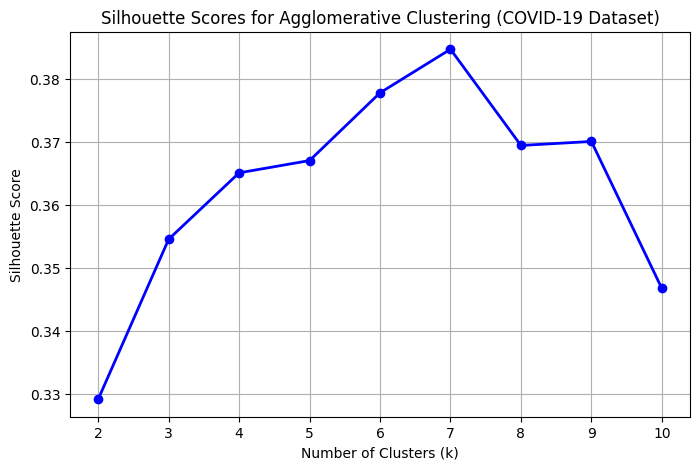

In [244]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Compute silhouette scores for different number of clusters
silhouette_scores = []

# Test clusters from 2 to 10
for i in range(2, 11):  # n_clusters from 2 to 10
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='ward')  # Using 'ward' linkage for clustering
    cluster_labels = agglo_model.fit_predict(df_sc_scaled)  # Using scaled data (df_sc_scaled)
    silhouette_avg = silhouette_score(df_sc_scaled, cluster_labels)  # Calculate silhouette score
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='blue', linewidth=2)
plt.title('Silhouette Scores for Agglomerative Clustering (COVID-19 Dataset)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


Skipping Ward linkage with Manhattan metric (not supported).


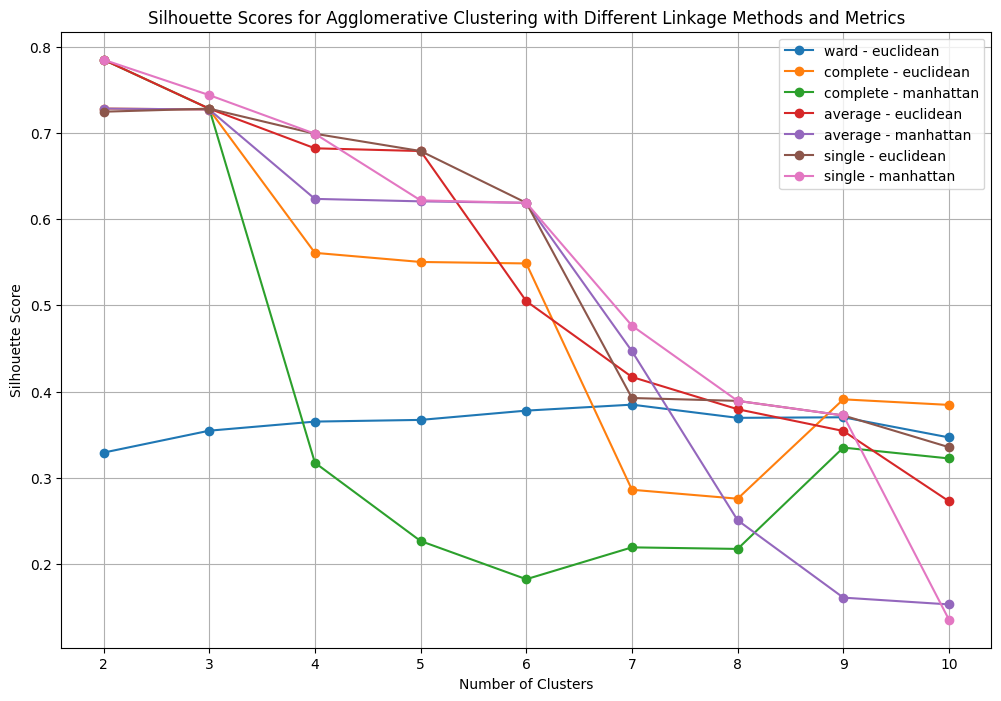

Best Silhouette Score: 0.7851185820031913
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: manhattan


In [245]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

# Variables to keep track of the best silhouette score and parameters
best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

# List to store results for plotting
results_for_plotting = []

# Loop over all combinations of linkage methods and metrics
for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            # Handle 'ward' linkage which does not use the 'metric' parameter
            if linkage_method == 'ward':
                agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
            else:
                agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)

            # Fit the model and predict clusters
            y_agglo = agglo.fit_predict(df_sc_scaled)  # Use scaled data (df_sc_scaled)

            # Calculate silhouette score
            silhouette_avg = silhouette_score(df_sc_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            # Update the best silhouette score and parameters if needed
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric

        # Store the silhouette scores for plotting
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each combination of linkage and metric
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

# Output the best silhouette score and corresponding parameters
print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")


**Dendogram Visualization**

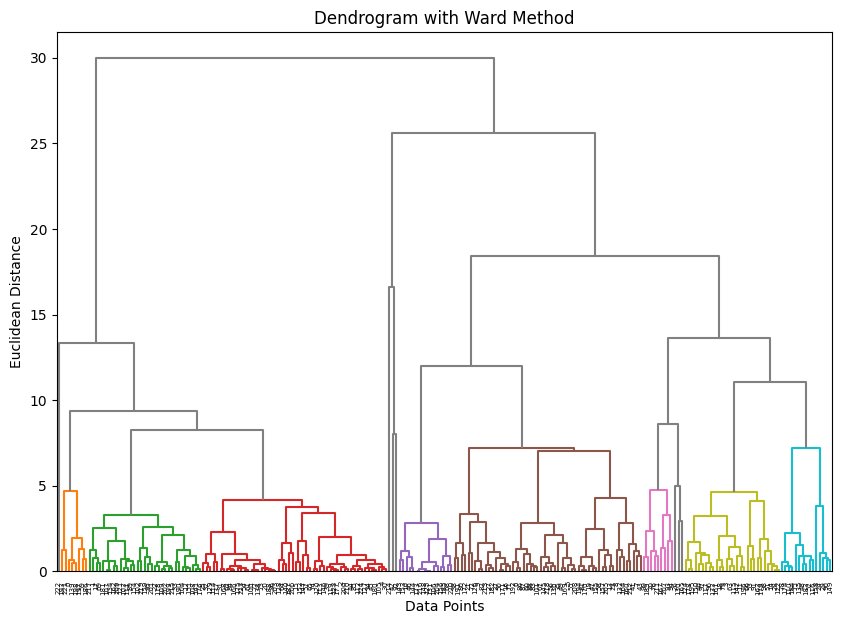

In [246]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# Use the scaled dataset for hierarchical clustering (df_sc_scaled)
# Ward Method
linked = linkage(df_sc_scaled, method='ward', metric='euclidean')

# Plot the dendrogram with a color threshold to differentiate clusters
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


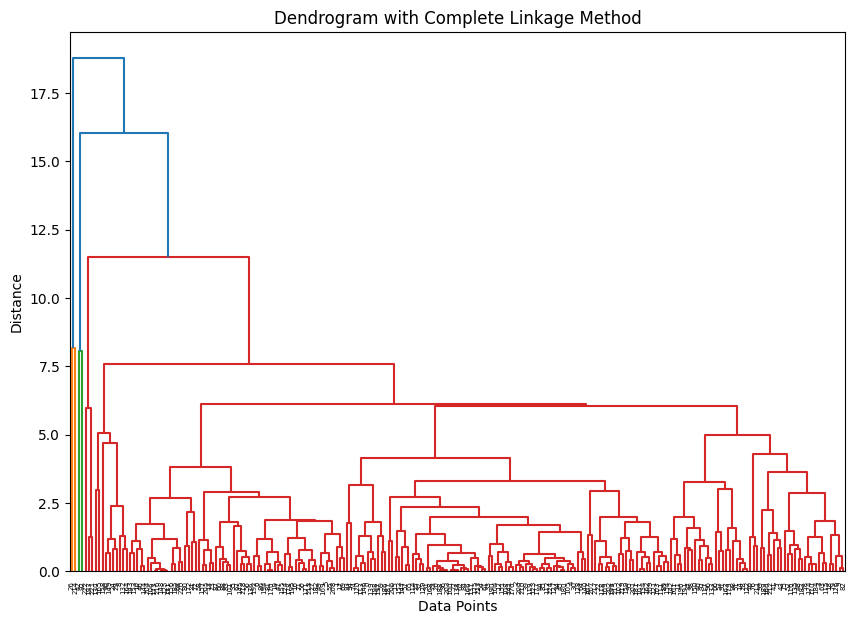

In [247]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# Complete Linkage Method (Max Distance)
linked = linkage(df_sc_scaled, method='complete', metric='euclidean')

# Plot the dendrogram with a color threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Linkage Method")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


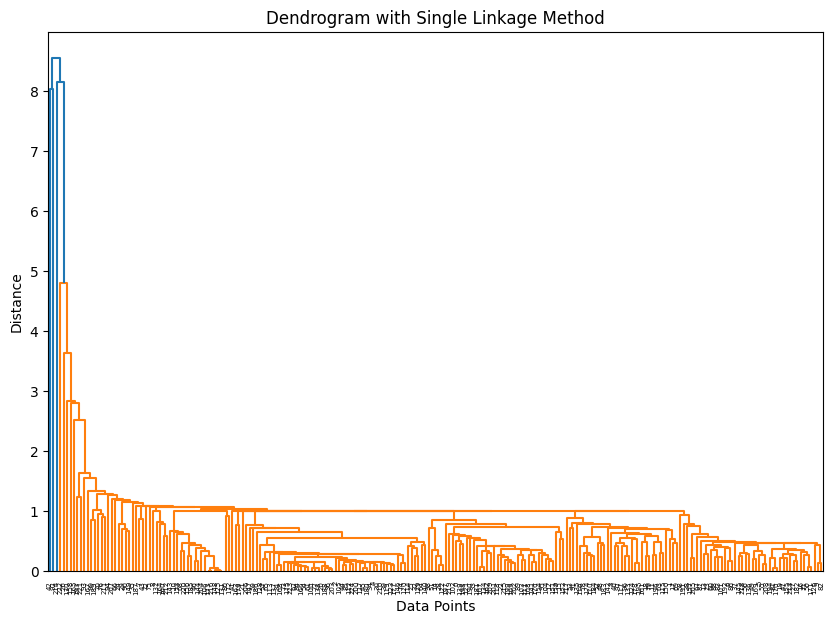

In [248]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# Min Distance (Single Linkage) using the scaled data (df_sc_scaled)
linked = linkage(df_sc_scaled, method='single', metric='euclidean')  # Euclidean is default

# Plot dendrogram with appropriate color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Linkage Method")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


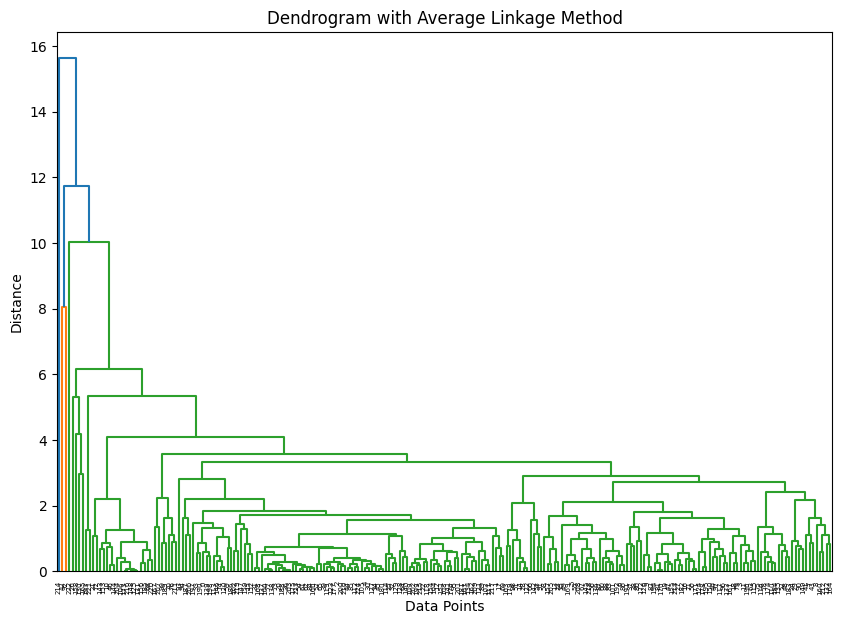

In [249]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# Average Distance (Average Linkage) using the scaled data (df_sc_scaled)
linked = linkage(df_sc_scaled, method='average', metric='euclidean')  # Euclidean distance is default

# Plot dendrogram with appropriate color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Linkage Method")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


**Hierarchical Clustering Model**

In [250]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_sc_scaled)

In [251]:
# Evaluation
ss = silhouette_score(df_sc_scaled, y_hc)
print(ss)

0.7851185820031913


**Dendogram Visualization for Hierarchical Clustering Model**

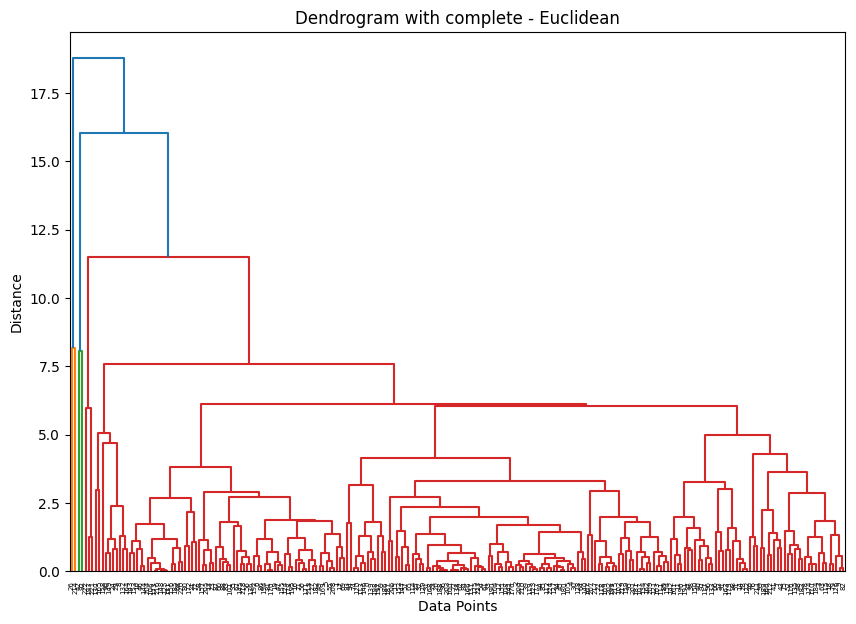

In [253]:
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Use Euclidean distance for Ward linkage
linked = linkage(df_sc_scaled, method=best_linkage, metric='euclidean')

# Plot the dendrogram with appropriate color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + " - Euclidean")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


**Merge with the original data**

In [254]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,KMeans_Cluster,Agglo
0,Afghanistan,Afghanistan,AFG,40462186,1,177827,7671,4395,190,4.313743,0,0
1,Albania,Albania,ALB,2872296,2,273870,3492,95349,1216,1.275058,1,0
2,Algeria,Algeria,DZA,45236699,0,265691,6874,5873,152,2.587216,0,0
3,Andorra,Andorra,AND,77481,2,40024,153,516565,1975,0.382271,2,0
4,Angola,Angola,AGO,34654212,0,99194,1900,2862,55,1.915438,0,0


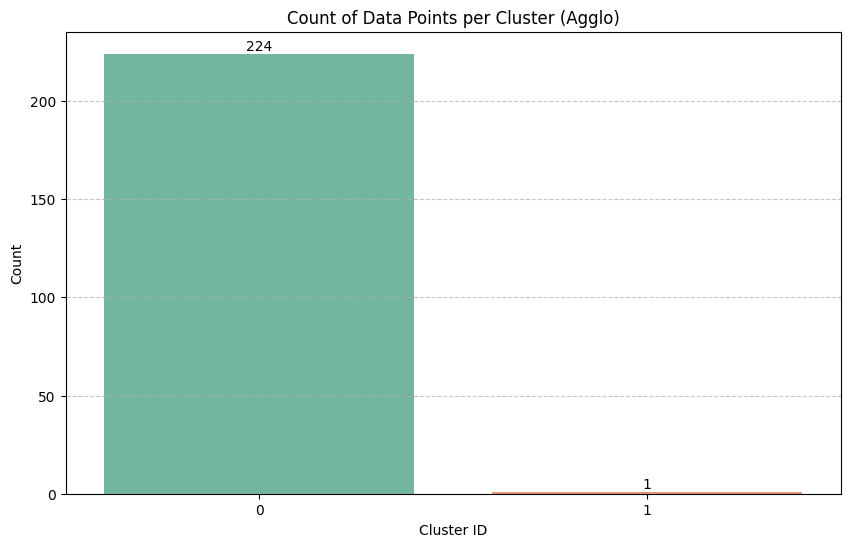

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

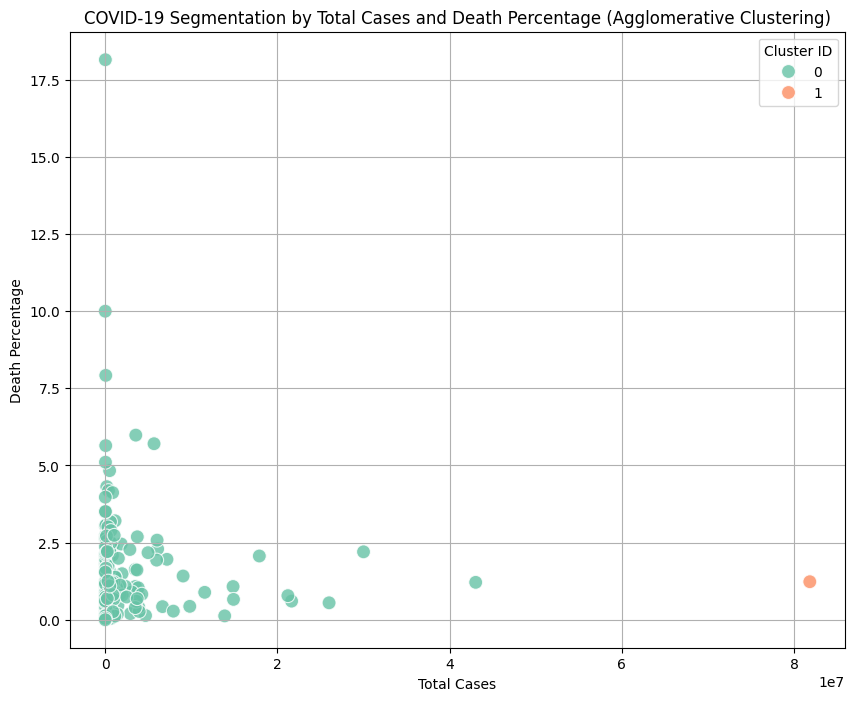

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of the COVID-19 dataset with Agglomerative Clustering labels (df['Cluster'])
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='Total Cases',  # Adjusted to Total Cases for the x-axis
    y='Death percentage',  # Adjusted to Death Percentage for the y-axis
    hue='Agglo',  # Corrected to 'Agglo' column from Agglomerative Clustering
    palette='Set2',  # Color palette for clusters
    s=100,  # Size of the scatter points
    alpha=0.8  # Transparency of the scatter points
)

# Set the title and labels
plt.title('COVID-19 Segmentation by Total Cases and Death Percentage (Agglomerative Clustering)')
plt.xlabel('Total Cases')
plt.ylabel('Death Percentage')

# Add legend with 'Cluster ID'
plt.legend(title='Cluster ID')

# Enable grid for better visibility
plt.grid(True)

# Display the plot
plt.show()

**Compare Both Model**

In [260]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score for both K-Means and Agglomerative Clustering
score_km = silhouette_score(df_sc_scaled, df['KMeans_Cluster'])  # K-Means clusters on scaled data
score_hc = silhouette_score(df_sc_scaled, df['Agglo'])  # Agglomerative Clustering clusters on scaled data

# Print the silhouette scores
print(f"Silhouette Score (K-Means): {score_km:.4f}")
print(f"Silhouette Score (Hierarchical): {score_hc:.4f}")

Silhouette Score (K-Means): 0.3788
Silhouette Score (Hierarchical): 0.7851


In [263]:
# Profiling the clusters to understand their characteristics
cluster_profile = df.groupby('Agglo')[['Total Cases', 'Death percentage', 'Tot\u00A0Cases//1M pop', 'Tot\u00A0Deaths/1M pop']].mean()

# Display the cluster profile
print("Cluster Profile:")
print(cluster_profile)

# Generate government policy recommendations based on cluster characteristics
for cluster_id, row in cluster_profile.iterrows():
    total_cases = row['Total Cases']
    death_percentage = row['Death percentage']
    cases_per_million = row['Tot\u00A0Cases//1M pop']
    deaths_per_million = row['Tot\u00A0Deaths/1M pop']

    print(f"\nCluster {cluster_id} Recommendations:")

    # Example of logic for generating recommendations
    if death_percentage < 1 and cases_per_million > 100000:
        print("  - Cluster has a relatively low death percentage but high cases per million. This suggests the country has many cases but is effectively reporting and monitoring.")
        print("  - Recommendation: Maintain testing capacity, focus on vaccination efforts, and prepare for healthcare system overload.")

    elif death_percentage > 3 and cases_per_million < 50000:
        print("  - Cluster shows high death percentage but low cases per million. This could indicate underreporting.")
        print("  - Recommendation: Government should increase testing capacity, improve reporting, and provide more healthcare resources to curb the death rate.")

    elif death_percentage < 1 and deaths_per_million < 50:
        print("  - Cluster shows low death rate and low deaths per million, possibly indicating good healthcare capacity.")
        print("  - Recommendation: Continue monitoring and encourage preventive measures, including social distancing and mask-wearing, to avoid any future spikes.")

    elif death_percentage > 2 and deaths_per_million > 1000:
        print("  - Cluster shows high death rate and high deaths per million, indicating a severe healthcare crisis.")
        print("  - Recommendation: Immediate emergency response is needed. Increase hospital capacity, provide intensive care units, and distribute medical supplies.")

    else:
        print("  - Cluster shows balanced death percentage and case numbers.")
        print("  - Recommendation: Maintain current health measures, monitor new variants, and ensure that testing infrastructure remains robust.")

Cluster Profile:
        Total Cases  Death percentage  Tot Cases//1M pop  Tot Deaths/1M pop
Agglo                                                                      
0      1.829182e+06          1.445072      136418.973214        1088.151786
1      8.183905e+07          1.231957      244734.000000        3015.000000

Cluster 0 Recommendations:
  - Cluster shows balanced death percentage and case numbers.
  - Recommendation: Maintain current health measures, monitor new variants, and ensure that testing infrastructure remains robust.

Cluster 1 Recommendations:
  - Cluster shows balanced death percentage and case numbers.
  - Recommendation: Maintain current health measures, monitor new variants, and ensure that testing infrastructure remains robust.



DETAILED CLUSTER ANALYSIS REPORT: K-Means Clustering

Numeric Cluster Summary (Mean & Median):

                  Population                Total Cases              \
                        mean        median         mean      median   
KMeans_Cluster                                                        
0               2.460618e+07  9.243590e+06    647267.29     69851.0   
1               1.393371e+07  2.814375e+06   2846211.68    603529.5   
2               2.748025e+08  2.748025e+08  55919434.00  55919434.0   
3               1.421539e+09  1.421539e+09  21591891.00  21591891.0   

               Total Deaths           Tot Cases//1M pop            \
                       mean    median              mean    median   
KMeans_Cluster                                                      
0                   8257.83    1337.0          44235.75   20532.0   
1                  32761.60    6643.5         278458.33  263564.5   
2                 834245.50  834245.5         192067.50  192

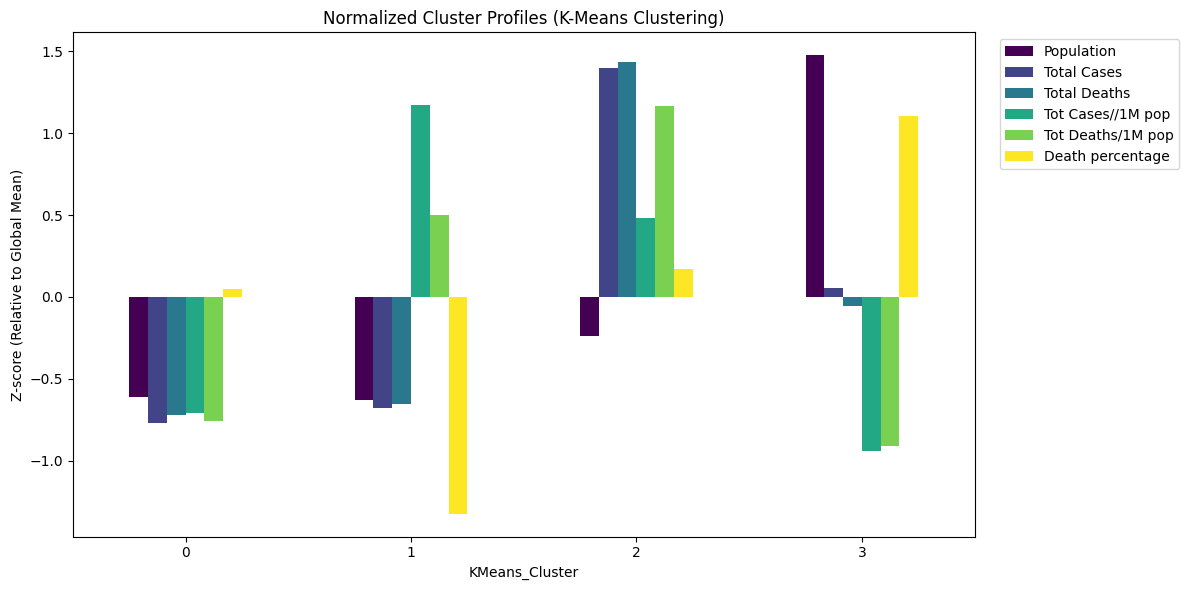

Generating interactive world map...




--- STRATEGIC & POLICY INSIGHTS ---


--------------- Cluster 0 ---------------
STATUS: Moderate/Stable Cluster
INSIGHT: Transmission is under control or past peak. Risk of complacency exists.
RECOMMENDATION:
1. Surveillance & Early Detection:
   - Targeted testing of high-risk groups
   - Wastewater monitoring for early outbreak signs
   - Variant tracking via genomic sequencing
2. Healthcare Preparedness:
   - Maintain ICU surge readiness
   - Rotate staff to reduce burnout
3. Vaccination & Boosters:
   - Mobile vaccination units for remote areas
   - Plan booster campaigns for vulnerable populations
4. Social & Economic Measures:
   - Gradual reopening with metrics-based triggers
   - Promote hybrid work to reduce crowding
5. Public Communication:
   - Prevent pandemic fatigue with clear messaging
   - Reinforce importance of hygiene, masking, and vaccination
            

--------------- Cluster 1 ---------------
STATUS: Critical Mortality Cluster
INSIGHT: Health system likely ove

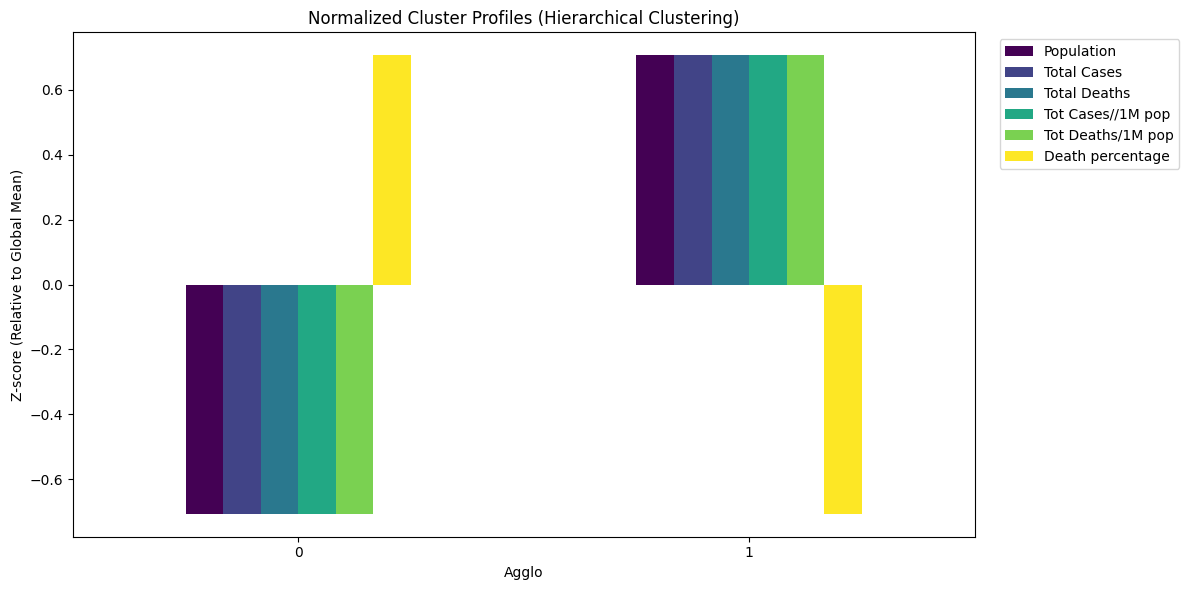

Generating interactive world map...




--- STRATEGIC & POLICY INSIGHTS ---


--------------- Cluster 0 ---------------
STATUS: Moderate/Stable Cluster
INSIGHT: Transmission is under control or past peak. Risk of complacency exists.
RECOMMENDATION:
1. Surveillance & Early Detection:
   - Targeted testing of high-risk groups
   - Wastewater monitoring for early outbreak signs
   - Variant tracking via genomic sequencing
2. Healthcare Preparedness:
   - Maintain ICU surge readiness
   - Rotate staff to reduce burnout
3. Vaccination & Boosters:
   - Mobile vaccination units for remote areas
   - Plan booster campaigns for vulnerable populations
4. Social & Economic Measures:
   - Gradual reopening with metrics-based triggers
   - Promote hybrid work to reduce crowding
5. Public Communication:
   - Prevent pandemic fatigue with clear messaging
   - Reinforce importance of hygiene, masking, and vaccination
            

--------------- Cluster 1 ---------------
STATUS: Critical Mortality Cluster
INSIGHT: Health system likely ove

In [267]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def detailed_cluster_analysis(cluster_column, method_label):
    """
    Generates a full report for a clustering solution including:
    - Numeric cluster summaries (mean & median)
    - Normalized profile bar chart
    - World map visualization
    - Data-driven strategic policy recommendations
    """

    print(f"\n{'='*70}")
    print(f"DETAILED CLUSTER ANALYSIS REPORT: {method_label}")
    print(f"{'='*70}\n")

    # ----------------------------
    # 1. Numeric Cluster Summary
    # ----------------------------
    numeric_cols = [
        "Population",
        "Total Cases",
        "Total Deaths",
        "Tot\u00A0Cases//1M pop",    # <-- corrected to match your DataFrame
        "Tot\u00A0Deaths/1M pop",
        "Death percentage"
    ]

    # Only keep columns that actually exist in the DataFrame
    numeric_cols = [col for col in numeric_cols if col in df.columns]

    cluster_summary = df.groupby(cluster_column)[numeric_cols].agg(['mean', 'median']).round(2)
    print("Numeric Cluster Summary (Mean & Median):\n")
    print(cluster_summary)

    # ----------------------------
    # 2. Normalized Cluster Profiles (Z-scores)
    # ----------------------------
    print("\nGenerating normalized bar chart for cluster comparison...\n")
    summary_means = df.groupby(cluster_column)[numeric_cols].mean()
    summary_zscore = (summary_means - summary_means.mean()) / summary_means.std()

    summary_zscore.plot(
        kind='bar',
        figsize=(12,6),
        colormap='viridis'
    )
    plt.title(f"Normalized Cluster Profiles ({method_label})")
    plt.ylabel("Z-score (Relative to Global Mean)")
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # ----------------------------
    # 3. Global Cluster Map
    # ----------------------------
    print("Generating interactive world map...\n")
    fig = px.choropleth(
        df,
        locations='Country',
        locationmode='country names',
        color=df[cluster_column].astype(str),
        projection='natural earth',
        title=f"Global Cluster Distribution ({method_label})",
        hover_data=['Total Cases', 'Tot\u00A0Deaths/1M pop'] # Corrected column name
    )
    fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="#e0e0e0")
    fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
    fig.show()

    # ----------------------------
    # 4. Strategic & Policy Recommendations
    # ----------------------------
    print("\n--- STRATEGIC & POLICY INSIGHTS ---\n")

    # Global averages for comparison
    global_case_rate = df['Tot\u00A0Cases//1M pop'].mean()
    global_death_rate = df['Tot\u00A0Deaths/1M pop'].mean()

    for cluster_id, row in df.groupby(cluster_column)[numeric_cols].mean().iterrows():
        print(f"\n{'-'*15} Cluster {cluster_id} {'-'*15}")

        case_rate = row['Tot\u00A0Cases//1M pop']
        death_rate = row['Tot\u00A0Deaths/1M pop']

        if death_rate > global_death_rate * 1.5:
            print("STATUS: Critical Mortality Cluster")
            print("INSIGHT: Health system likely overwhelmed. Mortality rate significantly above global average.")
            print("RECOMMENDATION: Expand ICU capacity, deploy international medical support, enforce immediate containment measures.")

        elif case_rate > global_case_rate * 1.5 and death_rate < global_death_rate:
            print("STATUS: Rapid Transmission Cluster")
            print("INSIGHT: Cases are growing quickly but healthcare is coping.")
            print("RECOMMENDATION: Intensify testing, contact tracing, isolation protocols, mask mandates, and public awareness campaigns.")

        else:
            print("STATUS: Moderate/Stable Cluster")
            print("INSIGHT: Transmission is under control or past peak. Risk of complacency exists.")
            print("""RECOMMENDATION:
1. Surveillance & Early Detection:
   - Targeted testing of high-risk groups
   - Wastewater monitoring for early outbreak signs
   - Variant tracking via genomic sequencing
2. Healthcare Preparedness:
   - Maintain ICU surge readiness
   - Rotate staff to reduce burnout
3. Vaccination & Boosters:
   - Mobile vaccination units for remote areas
   - Plan booster campaigns for vulnerable populations
4. Social & Economic Measures:
   - Gradual reopening with metrics-based triggers
   - Promote hybrid work to reduce crowding
5. Public Communication:
   - Prevent pandemic fatigue with clear messaging
   - Reinforce importance of hygiene, masking, and vaccination
            """)

    print(f"\n{'='*70}\nEnd of Report: {method_label}\n{'='*70}\n")

# =============================
# Run for your clustering methods
# =============================
detailed_cluster_analysis('KMeans_Cluster', 'K-Means Clustering')
detailed_cluster_analysis('Agglo', 'Hierarchical Clustering')